In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Дана статистика заболеваемости коронавирусом за определенный промежуток в разных странах, записанная в файл covid-19cases.csv. 

Необходимо:

- Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes)
- Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц
- Определить корреляцию каждой части света с другой.
- Вывести название части света, которая меньше всего коррелирует с другими

In [2]:
covid = pd.read_csv('C:/Users/User/Desktop/covid-19cases.csv')

In [4]:
display(covid.head(20))

,Unnamed: 0,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
5,5,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
7,7,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
9,9,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
covid = covid[covid.date != 'For Notes: ']

In [8]:
def data_info(data, name):
    shape_data = data.shape
    data_describe = data.describe().T
    data_numeric=data._get_numeric_data()
    data_null = data_numeric.isnull().sum()/len(data) * 100
    data_describe['Missing %']=data_null
    return data_describe

In [9]:
data_info(covid, covid)

,count,mean,std,min,25%,50%,75%,max,Missing %
Unnamed: 0,52873.0,5.287280e+04,3.052733e+04,0.000,2.643600e+04,5.287300e+04,7.931000e+04,1.057460e+05,0.000000
total_cases,49259.0,1.409296e+05,1.412627e+06,1.000,1.470000e+02,1.795000e+03,1.773350e+04,4.359803e+07,6.835247
new_cases,51979.0,1.677496e+03,1.518987e+04,-8261.000,0.000000e+00,1.200000e+01,2.000000e+02,4.825960e+05,1.690844
new_cases_smoothed,51185.0,1.651444e+03,1.482425e+04,-552.000,7.140000e-01,1.771400e+01,2.100000e+02,4.398491e+05,3.192556
total_deaths,40323.0,6.250125e+03,5.063745e+04,1.000,1.100000e+01,7.400000e+01,6.260000e+02,1.160995e+06,23.736122
new_deaths,51979.0,4.466994e+01,3.719878e+02,-1918.000,0.000000e+00,0.000000e+00,3.000000e+00,1.049100e+04,1.690844
new_deaths_smoothed,51185.0,4.471192e+01,3.617581e+02,-232.143,0.000000e+00,2.860000e-01,3.571000e+00,7.456857e+03,3.192556
total_cases_per_million,48993.0,2.595355e+03,5.120408e+03,0.001,7.590800e+01,5.014090e+02,2.899605e+03,5.597619e+04,7.338339
new_cases_per_million,51915.0,3.140314e+01,1.119649e+02,-2212.545,0.000000e+00,1.921000e+00,2.237100e+01,8.652658e+03,1.811889
new_cases_smoothed_per_million,51120.0,3.043195e+01,7.722738e+01,-269.978,2.120000e-01,3.514000e+00,2.529975e+01,2.472188e+03,3.315492


In [10]:
covid.year.unique()

array([20., 19.])

In [12]:
covid['date'] = pd.to_numeric(covid['month']).astype(str) + 'm'+ pd.to_numeric(covid['year']).astype(str) + 'y'
covid = covid[['continent', 'new_cases', 'date']].groupby(['continent', 'date']).sum().reset_index()
covid

,continent,date,new_cases
0,Africa,1.0m20.0y,0.0
1,Africa,10.0m20.0y,255390.0
2,Africa,12.0m19.0y,0.0
3,Africa,2.0m20.0y,3.0
4,Africa,3.0m20.0y,5134.0
...,...,...,...
61,South America,5.0m20.0y,680435.0
62,South America,6.0m20.0y,1336057.0
63,South America,7.0m20.0y,1841061.0
64,South America,8.0m20.0y,2206025.0


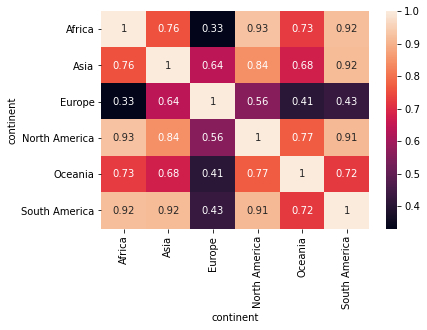

In [16]:
covid = covid.pivot(index='date', columns='continent', values='new_cases')
corr = covid.corr()
sns.heatmap(corr, annot=True)
plt.show()